## Machine Learning IPN - Trabajo 22 marzo 2021
Mario Alberto Ponce Pacheco

In [10]:
# Pre tratamiento de datos
import numpy as np
import pandas as pd

data = pd.read_csv("datasets/iris.data", header=None, names=["SL", "SW", "PL", "PW", "C"])
data = data.sample(len(data))

data["C1"] = data["C"].map(lambda c: 1 if c == "Iris-setosa" else 0)
data["C2"] = data["C"].map(lambda c: 1 if c == "Iris-versicolor" else 0)
data["C3"] = data["C"].map(lambda c: 1 if c == "Iris-virginica" else 0)

x1 = np.array(data["SL"])
x2 = np.array(data["SW"])
x3 = np.array(data["PL"])
x4 = np.array(data["PW"])

y1 = np.array(data["C1"])
y2 = np.array(data["C2"])
y3 = np.array(data["C3"])

X = np.array([
    x1,
    x2,
    x3,
    x4
]).T

Y = np.array([
    y1,
    y2,
    y3
]).T

## Ejercicios - Árboles de Decisión
1. Parte el conjunto de muestras X en X_train con 120 muestras y X_test con las muestras restantes.





In [31]:
from sklearn.model_selection import train_test_split
print("Shape de X", X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape de X_train", X_train.shape)
print("Shape de X_test",X_test.shape)

Shape de X (150, 4)
Shape de X_train (120, 4)
Shape de X_test (30, 4)


2. Parte el conjunto de clases codificadas Y en Y_train con 120 clases y Y_test con las clases restantes.

In [32]:
print("Shape de Y_train", Y_train.shape)
print("Shape de Y_test", Y_test.shape)

Shape de Y_train (120, 3)
Shape de Y_test (30, 3)


3. Crea un clasificador por árbol de decisión con sklearn.tree.DesicionTreeClassifier usando X_train y Y_train. Pista: usa clf.fit(X_train, Y_train).

In [34]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

4. Muestra el score para X_test y Y_test. Pista: usa clf.score(X_test, Y_test).

In [38]:
clf.score(X_test, Y_test)

0.9666666666666667

5. Pinta el árbol de decisión usando sklearn.tree.plot_tree(clf).


[Text(133.92000000000002, 199.32, 'X[3] <= 0.8\ngini = 0.443\nsamples = 120\nvalue = [[76, 44]\n[81, 39]\n[83, 37]]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 44\nvalue = [[0, 44]\n[44, 0]\n[44, 0]]'),
 Text(167.40000000000003, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.333\nsamples = 76\nvalue = [[76, 0]\n[37, 39]\n[39, 37]]'),
 Text(66.96000000000001, 126.83999999999999, 'X[3] <= 1.65\ngini = 0.066\nsamples = 38\nvalue = [[38, 0]\n[2, 36]\n[36, 2]]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 35\nvalue = [[35, 0]\n[0, 35]\n[35, 0]]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 3.0\ngini = 0.296\nsamples = 3\nvalue = [[3, 0]\n[2, 1]\n[1, 2]]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(267.84000000000003, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.097\nsamples = 38\nv

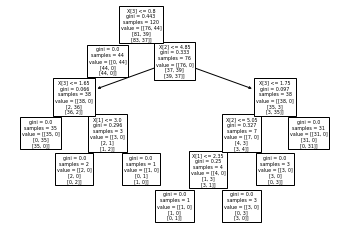

In [50]:
from sklearn.tree import plot_tree
plot_tree(clf)

6. Predice cuál es la clase de las siguientes muestras:

In [52]:
muestras =[
    [6.7, 3. , 5. , 1.7],
    [5.5, 2.6, 4.4, 1.2],
    [4.5, 2.3, 1.3, 0.3],
    [4.6, 3.1, 1.5, 0.2],
]
clf.predict(muestras)

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

* Las muestras 1 y 2 corresponden a C2 = Iris-versicolor
* Las muestras 3 y 4 corresponden a C1 = Iris-setosa